In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

from fbprophet import Prophet

from sklearn.model_selection import train_test_split

In [19]:
#MAPE 
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
df = pd.read_csv('kereta.csv', index_col=[0], parse_dates=[0])

In [21]:
df.head()

,Penumpang
Bulan,
2006-01-28,23008
2006-02-28,23410
2006-03-28,26132
2006-04-28,25314
2006-05-28,26624


In [22]:
df.tail()

,Penumpang
Bulan,
2019-06-28,68522
2019-07-28,76606
2019-08-28,69084
2019-09-28,69230
2019-10-28,71628


In [23]:
df.describe()

,Penumpang
count,166.000000
mean,43459.831325
std,15400.558447
min,21518.000000
25%,31516.500000
50%,34901.000000
75%,56528.000000
max,76606.000000


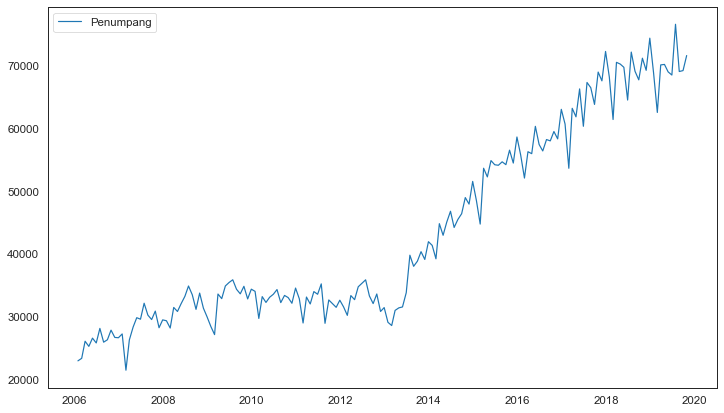

In [26]:
plt.figure(figsize=(12,7))
plt.plot(df.set_index('ds'))
plt.legend(['Penumpang'])

In [25]:
df = df.reset_index().rename(columns={'Bulan':'ds', 'Penumpang':'y'})

In [27]:
# Setup and train model
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


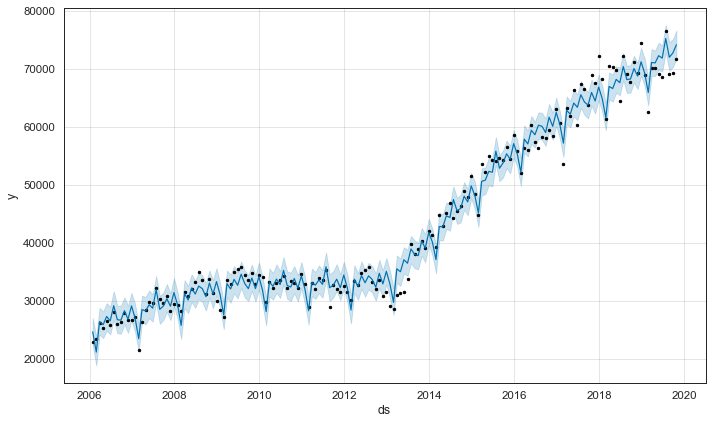

In [28]:
future = model.make_future_dataframe(periods=0, freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)

In [29]:
mean_absolute_percentage_error(y_true=df['y'],
                   y_pred=forecast['yhat'])

3.365963997341713

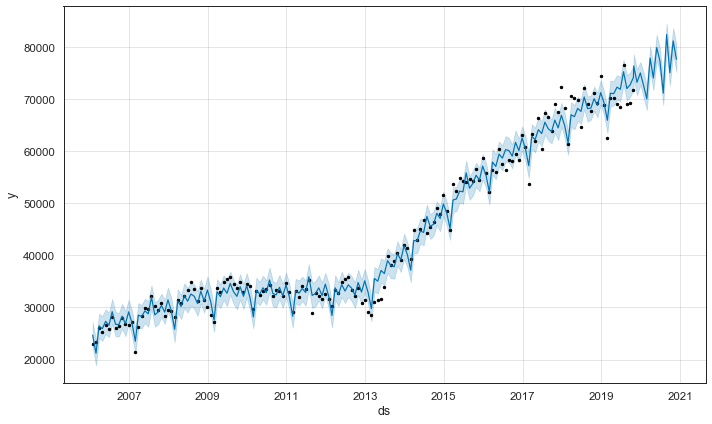

In [31]:
future = model.make_future_dataframe(periods=14, freq='M')
forecast = model.predict(future)
fig = model.plot(forecast)

In [32]:
forecast.to_csv('file1.csv')